# 1. spaCy basics

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython.The library is published under the MIT license and currently offers statistical neural network models for English, German, Spanish, Portuguese, French, Italian, Dutch and multi-language NER, as well as tokenization for various other languages.$^{1}$

https://spacy.io/

## Installation and setup 

1. First we need to download the spaCy library:
    > `conda install -c conda-forge spacy`
    > <br>*or*<br>
    > `pip install -U spacy`
2. Then, we download the language model we want to use:
    > `python -m spacy download en_core_web_lg`
    > <br>*alternatively*<br>
    > `import spacy.cli` <br>
    >  `spacy.cli.download("en_core_web_lg") `
3. Finally, you load the model:
    > `spacy.load('en_core_web_lg')`


In [1]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
# Import spaCy
import spacy

# load the language model
nlp = spacy.load('en_core_web_lg')

In [3]:
# Create a Doc object
doc = nlp(u"The quick brown fox jumps over the lazy dog!")

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

The DET det
quick ADJ amod
brown ADJ amod
fox PROPN nsubj
jumps VERB ROOT
over ADP prep
the DET det
lazy ADJ amod
dog NOUN pobj
! PUNCT punct


In [4]:
# Get a description for a given POS tag, dependency label or entity type

spacy.explain('PUNCT')

'punctuation'

___
## Pipeline
When we call `nlp` on our string, we are creating a `DOC` object which is 
basically an array of token objects made from that string. We can then perform a series of operations on that tokens in order to dercribe the data.   <br>Image source: https://spacy.io/usage/spacy-101#pipelines

<img src="img/pipeline1.png" width="600">

In [5]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x11b4d4c18>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x11bf68c48>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x11bf68ca8>)]

## Tokenization

This is usually the first step in Natural Language Processing. Tokenization means 'chopping' the text into pieces in order to create tokens. Since we are using spaCy with a pretrained language model, these tokens also contain some descriptive information.

In [6]:
# basic tokenization with a split() function
text = "While Amazon CEO Jeff Bezos wasn't throwing a lavish party at his $23 million mansion in Washington, DC"
print(text.split())

['While', 'Amazon', 'CEO', 'Jeff', 'Bezos', "wasn't", 'throwing', 'a', 'lavish', 'party', 'at', 'his', '$23', 'million', 'mansion', 'in', 'Washington,', 'DC']


In [7]:
doc = nlp(text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

While SCONJ mark
Amazon PROPN compound
CEO PROPN compound
Jeff PROPN compound
Bezos PROPN nsubj
was AUX aux
n't PART neg
throwing VERB ROOT
a DET det
lavish ADJ amod
party NOUN dobj
at ADP prep
his DET poss
$ SYM quantmod
23 NUM compound
million NUM nummod
mansion NOUN pobj
in ADP prep
Washington PROPN pobj
, PUNCT punct
DC PROPN appos


For a full list of `Part Of Speech` Tags visit https://spacy.io/api/annotation#pos-tagging

Notice how `wasn't` has been split into two tokens. spaCy recognizes both the root verb is and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens

Tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

___
#### Dependencies
We also see the syntactic dependencies assigned to each token. `Bezos` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [8]:
spacy.explain('nsubj')

'nominal subject'

#### Other token attributes

|Tag|Description|
|:------|:------:|
|`.text`|The original word text|
|`.lemma_`|The base form of the word|
|`.pos_`|The simple part-of-speech tag|
|`.tag_`|The detailed part-of-speech tag|
|`.shape_`|The word shape – capitalization, punctuation, digits|
|`.is_alpha`|Is the token an alpha character?|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|

## Named Entity Recognition

NER introduces another layer of context. The spaCy language model recognizes that certain tokens represent for example locations or organizations. 
https://spacy.io/usage/linguistic-features#named-entities

In [9]:
ner = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in ner:
    print(token.text, end=' | ')

print('\n----')

for ent in ner.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


We'll also see how spaCy can interpret the tokens combined `$23 million` as referring to ***money***.

#### Visualizing NER

In [10]:
from spacy import displacy

In [11]:
doc = nlp(u'By 2010 standards, the iPad was thin—half an inch thin—and weighed 1.5 pounds. It had a capacitive multitouch display, ran on Apple’s custom A4 chip, and offered 10 hours of battery life, something that would win it praise in early reviews. WIRED’s review noted that watching video on it was “terrific,” as was reading on it, and that the iPad was well-positioned as a gaming platform. But the iPad was also hamstrung in its earliest incarnation. It didn’t have a camera, it didn’t support multitasking, the Safari browsing experience was limited, and the virtual keyboard came with a learning curve')
displacy.render(doc, style='ent', jupyter=True)

#### Visualizing dependency parser

In [12]:
doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')

In [13]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

If the arches of dependecy parser do not appear on the visualization, in a new cell run `displacy.serve(doc, style='dep')` and then open new browser page and type: `http://127.0.0.1:5000/`


## Lemmatization and stemming

`Stemming` is a proces of reducing inflected words to their word stem. Here, "boat" would be the stem for [boat, boater, boating, boats]. However, in languages with many exceptions we need more sophisticated methods to perform proper stemming. spaCy does not include a stemmer, inbsted it relies entirely on the lemmatization.
<br><br>
`Lemmatization` on the other hand applies morphological analysis to the word and considers full vocabulary of the language. As a result, the lemma of `was` is be, `better` is good and so on.

In [14]:
doc = nlp(u"Running was the only thing he could think of while playing with knives")

In [15]:
for token in doc:
    print(f'{token.text:{12}} {token.lemma_:{12}} {token.pos_:{8}} {spacy.explain(token.tag_)}')

Running      run          VERB     verb, gerund or present participle
was          be           AUX      verb, past tense
the          the          DET      determiner
only         only         ADJ      adjective
thing        thing        NOUN     noun, singular or mass
he           -PRON-       PRON     pronoun, personal
could        could        VERB     verb, modal auxiliary
think        think        VERB     verb, base form
of           of           ADP      conjunction, subordinating or preposition
while        while        SCONJ    conjunction, subordinating or preposition
playing      play         VERB     verb, gerund or present participle
with         with         ADP      conjunction, subordinating or preposition
knives       knife        NOUN     noun, plural


## Stop words

Certain words appear so often in language that they do not require tagging. These words are called `stop words` and we usually filter them out from the processed text. spaCy and other NLP libraries contain inbuilt lists of stop words that are ready for usage. NB stop words list can be modified. spaCy contains 326 stopwords.

In [16]:
#print(nlp.Defaults.stop_words)
#len(nlp.Defaults.stop_words)

In [17]:
# check if a word is a stop word
nlp.vocab['me'].is_stop

# add a stop word
nlp.Defaults.stop_words.add('macaroni')

# set the stop_word tag on the lexeme
nlp.vocab['macaroni'].is_stop = True

# remove the word from the list
nlp.Defaults.stop_words.remove('macaroni')

# remove the stop_word tag from the lexeme
nlp.vocab['macaroni'].is_stop = False

References: <br/>
1.Wikipedia

# 2. Word embeddings 

In a nutshell word embeddings or word vectors are numerical representation of text. Embeddings are capable of capturing the context of a word within a document and provide a broader meaning.

`You shall know a word by the company it keeps` said by a famous British linguist John Rupert Firth represent this idea, meaning that the words in part determined by its collocations. In that way, if we represent words in a multidimensional space the words similar to each like `car` and `bike` other will have closer values. Cosine similarity is used to calculate the distance between the vectors - and it is a measure how similar the words are (0:1)

Mostly used models: Word2Vec (SkipGram and CBOW algorithms) and GloVe.

Before feeding the text to any machine learning model we first need to convert text strings into numbers.  

#### Word embeddings with spaCy

In [18]:
# We load the large english language model - that was trained on OntoNotes - large corpus comprising various genres 
# of text (news, conversational telephone speech, weblogs, usenet newsgroups, broadcast, talk shows). 
# With GloVe vectors trained on CommonCrawl - 685k unique vectors (300 dimensions)

In [19]:
# acces vector a word
nlp('car').vector

# shape o a word vector
nlp('car').vector.shape

(300,)

In [101]:
nlp('car').similarity(nlp('vehicle'))

0.7667539083302181

# 3. Topic modelling

In [21]:
# Download dataset from: https://www.kaggle.com/snap/amazon-fine-food-reviews

In [67]:
import pandas as pd

In [68]:
reviews = pd.read_csv('Reviews.csv')

In [69]:
reviews.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [70]:
reviews.shape

(568454, 10)

In [71]:
reviews['Text'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [72]:
reviews['Text'][200]

"Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?"

## Text preprocessing

In [73]:
reviews.shape

(568454, 10)

In [74]:
reviews.dropna(inplace=True)
reviews.shape

(568411, 10)

In [75]:
# create a subset of df in order to improve performance
#subset = reviews.Text[:10000]
subset = reviews.Text[:1000]

In [76]:
subset

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
5      I got a wild hair for taffy and ordered this f...
6      This saltwater taffy had great flavors and was...
7      This taffy is so good.  It is very soft and ch...
8      Right now I'm mostly just sprouting this so my...
9      This is a very healthy dog food. Good for thei...
10     I don't know if it's the cactus or the tequila...
11     One of my boys needed to lose some weight and ...
12     My cats have been happily eating Felidae Plati...
13     good flavor! these came securely packed... the...
14     The Strawberry Twizzlers are my guilty pleasur...
15     My daughter loves twizzlers and this shipment ...
16     I love eating them and they are good for watch...
17     I am very satisfied with

### Removing stopwords

In [77]:
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict 

In [78]:
# cleaning function for removing stopwords and creating lemma
def cleaning(doc):
    txt = [token.lemma_ for token in doc if not token.is_stop]
    return txt

In [79]:
# example of a 'dirty' review before processing
subset[200]

"Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?"

In [80]:
# lowercase the words and remove all html tags and store the results in remove_html_tags
remove_html_tags = [re.sub(re.compile('<.*?>'), '', str(row)).lower() for row in subset]

In [81]:
# print results after removing html tags
remove_html_tags[200]

"even with small containers, they don't fill them up.  these little tins are less than half filled and at the price charged it seems a rip-off. is there some exotic ingredient as costly as gold contained in those tiny squares?  or how about the cereal ploy, they were filled at the factory but settled in transport.can manufacturers be honest in their dealings?"

Results you should receive: <br>
`"even with small containers, they don't fill them up.  these little tins are less than half filled and at the price charged it seems a rip-off. is there some exotic ingredient as costly as gold contained in those tiny squares?  or how about the cereal ploy, they were filled at the factory but settled in transport.can manufacturers be honest in their dealings?"`

In [82]:
# remove all non-alphabetic characters and store in remove_non_alpha
remove_non_alpha = [re.sub("[^A-Za-z']+", ' ', row) for row in remove_html_tags]

In [83]:
# print the results after removing non-alphabetic characters
remove_non_alpha[200]

"even with small containers they don't fill them up these little tins are less than half filled and at the price charged it seems a rip off is there some exotic ingredient as costly as gold contained in those tiny squares or how about the cereal ploy they were filled at the factory but settled in transport can manufacturers be honest in their dealings "

Results you should get: <br>
`"even with small containers they don't fill them up these little tins are less than half filled and at the price charged it seems a rip off is there some exotic ingredient as costly as gold contained in those tiny squares or how about the cereal ploy they were filled at the factory but settled in transport can manufacturers be honest in their dealings "`

In [84]:
# apply the cleaning function to the
txt = [cleaning(doc) for doc in nlp.pipe(remove_non_alpha, batch_size = 1000, n_threads = -1)]

In [85]:
print(txt[200])

['small', 'container', 'fill', 'little', 'tin', 'half', 'fill', 'price', 'charge', 'rip', 'exotic', 'ingredient', 'costly', 'gold', 'contain', 'tiny', 'square', 'cereal', 'ploy', 'fill', 'factory', 'settle', 'transport', 'manufacturer', 'honest', 'dealing']


In [86]:
reviews['Text'][200]

"Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?"

Install gensim via anaconda `conda install -c conda-forge gensim`

In [87]:
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

For full documentation go to: <br> `https://radimrehurek.com/gensim/models/ldamodel.html`<br> `https://radimrehurek.com/gensim/corpora/dictionary.html`

In [88]:
# Creates a dictionary, which is a mapping of word IDs to words.
id2word = corpora.Dictionary(txt)

# Turns each document into a bag of words - containing how many times each word (word id) occured within a document
corpus = [id2word.doc2bow(doc) for doc in txt]

In [89]:
print(id2word[19])

actually


In [90]:
print(corpus[1])

[(14, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]


### Bag of words : occurences or a word within a document. BoW disregards all informatio about the word meaning or word order. It simply counts how many occurences of a word is there in each document

In [91]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=42,
                                           #update_every=1,
                                           #passes=10,
                                           alpha=.1, #distribution of the number of topics per document
                                           chunksize=100,
                                           per_word_topics=True)

In [92]:
from pprint import pprint

In [93]:
pprint(lda_model.print_topics(num_words=10))

[(0,
  '0.015*"son" + 0.015*"great" + 0.013*"good" + 0.012*"find" + 0.012*"love" + '
  '0.010*"dinner" + 0.010*"plastic" + 0.009*"use" + 0.009*"look" + '
  '0.008*"taste"'),
 (1,
  '0.026*"good" + 0.019*"baby" + 0.015*"product" + 0.014*"organic" + '
  '0.014*"food" + 0.013*"love" + 0.013*"try" + 0.013*"bag" + 0.012*"great" + '
  '0.012*"price"'),
 (2,
  '0.076*"chip" + 0.023*"taste" + 0.018*"like" + 0.018*"salt" + 0.017*"flavor" '
  '+ 0.015*"bar" + 0.015*"product" + 0.013*"kettle" + 0.010*"try" + '
  '0.009*"brand"'),
 (3,
  '0.024*"tea" + 0.018*"bag" + 0.017*"like" + 0.015*"coffee" + 0.013*"taste" + '
  '0.012*"order" + 0.012*"chocolate" + 0.011*"flavor" + 0.010*"buy" + '
  '0.008*"time"'),
 (4,
  '0.022*"good" + 0.020*"like" + 0.020*"flavor" + 0.020*"food" + 0.015*"sauce" '
  '+ 0.012*"hot" + 0.011*"potato" + 0.011*"chip" + 0.011*"rice" + '
  '0.010*"spicy"')]


In [94]:
# Coherence score give an approximation of how good the topics are, it determines the optimal number of topics.
# So, the higher the score the better : 0 < x < 1


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=txt, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Nump


Coherence Score:  0.27253753198717245


In [95]:
# source: https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [96]:
# source https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=txt, start=2, limit=40, step=6)

/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy

/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:320: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  i, j, x)
/Users/majakiszka/anaconda3/lib/python3.7/site-packages/scipy

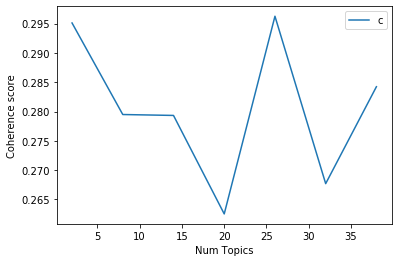

In [97]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [98]:
# conda install -c conda-forge pyldavis

In [99]:
from pyLDAvis import gensim as pyLDAvis_gensim
import pickle 
import pyLDAvis

The visualization below, will allow you to compare topics and see what is the distribution of words per topics

In [100]:
%%time

# Visualize the topics
pyLDAvis.enable_notebook()

vis = pyLDAvis_gensim.prepare(lda_model, corpus, id2word, sort_topics=True)
#lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis)

CPU times: user 3.87 s, sys: 868 ms, total: 4.74 s
Wall time: 2min 58s


/Users/majakiszka/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
